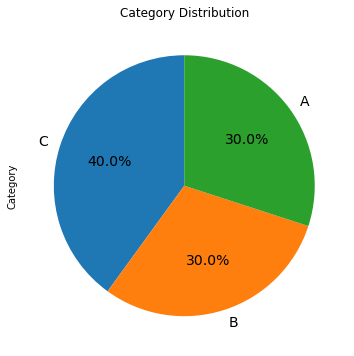

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'B', 'A', 'C', 'C', 'C']
})

# Get the value counts of the column
data = df['Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False,
textprops={'fontsize': 14, 'fontweight': 'normal'})
plt.title('Category Distribution')
plt.show();
